<a href="https://colab.research.google.com/github/prarthanaVengurlekar5/Project/blob/main/Intrusion_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intrusion Detection System**


An Intrusion Detection System (IDS) with Machine Learning (ML) and Deep Learning (DL) uses advanced algorithms to automatically detect unusual or suspicious activities in a computer network, helping to identify potential security threats before they cause harm.

# STEP 1: INTRODUCTION

An Intrusion Detection System (IDS) monitors network traffic and system activities for signs of unauthorized access, misuse, or security policy violations. It works by analyzing data packets flowing through the network or activities on a system, comparing them to known signatures of attacks or abnormal behavior patterns. When it detects suspicious activity, it generates alerts or takes predefined actions like blocking traffic or notifying administrators. IDS can operate in two modes: signature-based, which compares activities to a database of known attack patterns, and anomaly-based, which flags activities that deviate from established norms. IDS plays a crucial role in maintaining network security by providing early detection and response to potential threats.






# STEP 2: IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#STEP 3: LOAD DATA

In [2]:
# Read Train and Test dataset
data_train = pd.read_csv(r"/content/drive/MyDrive/ANN/ANN/KDDTrain+.txt")

In [3]:
# Check data
data_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [4]:
columns = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot'
,'num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations'
,'num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate'
,'srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count'
,'dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate'
,'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome','level'])

In [5]:
# Assign name for columns
data_train.columns = columns

In [6]:
data_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [8]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})  #describe()-understand the central tendency, dispersion, and shape of the dataset.

#This code applies a background color gradient (from light to dark blue) to the descriptive statistics table of the training data and sets the font style to 'Segoe UI'.

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,45567.100824,19779.271433,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,0.001342,0.001103,0.302194,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.108207,27.738093,0.284487,0.282488,0.119959,0.121184,0.660925,0.063053,0.097322,182.149200,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5870354.480801,4021285.112114,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,0.036603,0.045155,24.399715,0.483937,0.022181,0.099370,0.000000,0.002817,0.096613,114.508828,72.636092,0.446457,0.447024,0.320437,0.323648,0.439624,0.180315,0.259831,99.206565,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [9]:
data_train.loc[data_train['outcome'] == "normal", "outcome"] = 'normal'
data_train.loc[data_train['outcome'] != 'normal', "outcome"] = 'attack'

#This code updates the 'outcome' column in the training data: if the value is "normal", it remains unchanged; if it's anything other than "normal", it's changed to "attack". Essentially, it categorizes instances as either 'normal' or 'attack' based on their original outcome values.

In [10]:
def pie_plot(df, cols_list, rows, cols):
    fig, axes = plt.subplots(rows, cols)
    for ax, col in zip(axes.ravel(), cols_list):
        df[col].value_counts().plot(ax=ax, kind='pie', figsize=(7, 7), fontsize=10, autopct='%1.0f%%')
        ax.set_title(str(col), fontsize = 12)
    plt.show()

#This function creates a grid of pie charts based on the specified DataFrame and list of columns. Each pie chart represents the distribution of values for a particular column in the DataFrame, displayed in a subplot grid with the specified number of rows and columns.
#%: That formatting instructions will follow.
#1: It specifies a minimum width of 1.
#.0: The precision after the decimal point. In this case, it specifies zero decimal places.
#f: The format should be interpreted as a float.
#%%: The first "%" is an escape character, and the second "%" is the literal "%" symbol to be displayed.
#So autopct='%1.0f%%' specifies that the percentage labels on the pie chart should be formatted with no decimal places, taking up at least one character space, and followed by a "%" symbol.

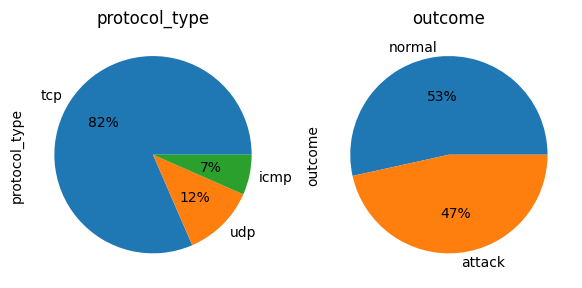

In [11]:
pie_plot(data_train, ['protocol_type', 'outcome'], 1, 2)
#1: the pie charts will be arranged in a single row.
#2: there will be two pie charts displayed side by side.

In [12]:
# In this pie chart, Protocol_type tcp is 82% & outcome 53% for normal, 47% for attck.

In [13]:
from sklearn.preprocessing import RobustScaler

In [14]:
def Scaling(df_num, cols):
    std_scaler = RobustScaler()
    std_scaler_temp = std_scaler.fit_transform(df_num)
    std_df = pd.DataFrame(std_scaler_temp, columns =cols)
    return std_df
#this function takes a DataFrame with numerical columns, scales the numerical data using RobustScaler, and returns a new DataFrame containing the scaled values with the original column names.

In [15]:
cat_cols = ['is_host_login','protocol_type','service','flag','land', 'logged_in','is_guest_login', 'level', 'outcome']
def preprocess(dataframe):
    df_num = dataframe.drop(cat_cols, axis=1)  #dropping the categorical columns from the original DataFrame.
    num_cols = df_num.columns                  #gets the names of the numerical columns in the (df_num) DataFrame.
    scaled_df = Scaling(df_num, num_cols)      #scales the numerical columns in (df_num) using the Scaling function and stores the scaled DataFrame in scaled_df.

    dataframe.drop(labels=num_cols, axis="columns", inplace=True)  #This line drops the original numerical columns from the dataframe.
    dataframe[num_cols] = scaled_df[num_cols]                      #replaces the original numerical columns in dataframe with the scaled numerical columns from scaled_df.

    dataframe.loc[dataframe['outcome'] == "normal", "outcome"] = 0
    dataframe.loc[dataframe['outcome'] != 0, "outcome"] = 1        #encode the 'outcome' column to have value 0 for 'normal' and 1 for any other outcome.

    dataframe = pd.get_dummies(dataframe, columns = ['protocol_type', 'service', 'flag'])
    return dataframe  #creates dummy variables for the categorical columns, expanding them into separate binary columns for each category.

    #this function preprocesses the DataFrame by scaling numerical features, encoding the outcome column, and creating dummy variables for categorical features.

#STEP 4:SPLITING THE DATASET

In [16]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [17]:
scaled_train = preprocess(data_train)

In [18]:
#Preprocessing
x = scaled_train.drop(['outcome', 'level'] , axis = 1).values  #Extracts the features for training the model, excluding the 'outcome' and 'level' columns, and converts the DataFrame to a NumPy array.
y = scaled_train['outcome'].values                             #Extracts the target variables for classification ('outcome')
y_reg = scaled_train['level'].values                           #Extracts the target variables for regression ('level')from the 'scaled_train' DF and converts them to NumPy arrays.

#Principal Component Analysis (PCA)
pca = PCA(n_components=20)                                      #Initializes a PCA object with 20 components.
pca = pca.fit(x)                                                # Fits the PCA model to the training features 'x'.
x_reduced = pca.transform(x)                                    #Transforms the original features 'x' into a reduced feature space using the fitted PCA model.
print("Number of original features is {} and of reduced features is {}".format(x.shape[1], x_reduced.shape[1]))

#Data Splitting
y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)                                            # Splits the dataset into training and testing sets for classification, with 80% of the data used for training and 20% for testing.
x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced = train_test_split(x_reduced, y, test_size=0.2, random_state=42)    #reduced feature space 'x_reduced' into training and testing sets for classification.
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)                        # Splits the dataset into training and testing sets for regression, using the original features 'x' and the regression target 'y_reg'.

#WE prepares the data for training classification and regression models, including PCA dimensionality reduction, and splits the data into training and testing sets for evaluation.

Number of original features is 122 and of reduced features is 20


In [19]:
kernal_evals = dict()
def evaluate_classification(model, name, X_train, X_test, y_train, y_test):    #function evaluate_classification that evaluates the performance of a classification model using various metrics such as accuracy, precision, and recall.
    train_accuracy = metrics.accuracy_score(y_train, model.predict(X_train))   #Calculate the accuracy of the model on the training and testing sets respectively using accuracy_score.
    test_accuracy = metrics.accuracy_score(y_test, model.predict(X_test))

    train_precision = metrics.precision_score(y_train, model.predict(X_train))                                                                       # Calculate the precision of the model on the training and testing sets respectively using precision_score.
    test_precision = metrics.precision_score(y_test, model.predict(X_test))

    train_recall = metrics.recall_score(y_train, model.predict(X_train))                                                                             # Calculate the recall of the model on the training and testing sets respectively using recall_score.
    test_recall = metrics.recall_score(y_test, model.predict(X_test))

#Storing Evaluation Metrics:
    kernal_evals[str(name)] = [train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall]
    print("Training Accuracy " + str(name) + " {}  Test Accuracy ".format(train_accuracy*100) + str(name) + " {}".format(test_accuracy*100))
    print("Training Precesion " + str(name) + " {}  Test Precesion ".format(train_precision*100) + str(name) + " {}".format(test_precision*100))
    print("Training Recall " + str(name) + " {}  Test Recall ".format(train_recall*100) + str(name) + " {}".format(test_recall*100))                   #Stores the evaluation metrics (accuracy, precision, and recall) in a dictionary kernal_evals with the model name as the key.

    actual = y_test
    predicted = model.predict(X_test)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)                                                                                     #Computes the confusion matrix for the model's predictions on the testing set using
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['normal', 'attack'])                            # specifying the display labels as ['normal', 'attack'].

    fig, ax = plt.subplots(figsize=(7,7))
    ax.grid(False)
    cm_display.plot(ax=ax)

# STEP 5:MODEL BUILDING

## 1: Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Training Accuracy Logistic Regression 87.49417029679391  Test Accuracy Logistic Regression 87.32288152411193
Training Precesion Logistic Regression 86.29863792591335  Test Precesion Logistic Regression 86.44555376935443
Training Recall Logistic Regression 86.87554729715299  Test Recall Logistic Regression 86.5187568803455


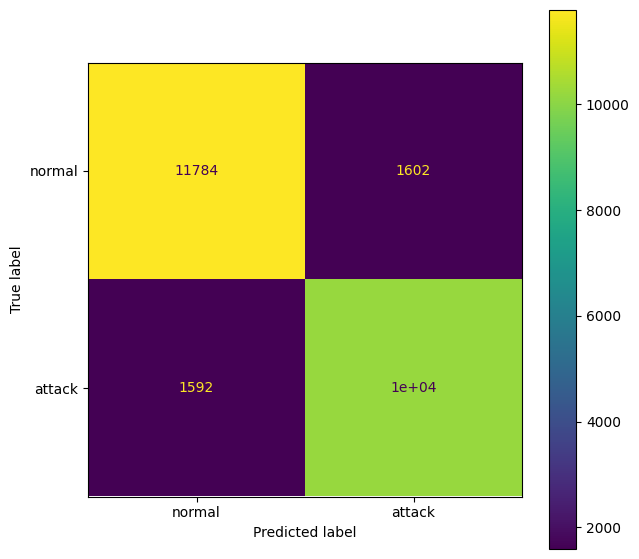

In [21]:
lr = LogisticRegression().fit(x_train, y_train)
evaluate_classification(lr, "Logistic Regression", x_train, x_test, y_train, y_test)

The Confusion Matrix created has four different quadrants:

False Negative (Top-Left Quadrant)

False Positive (Top-Right Quadrant)

True Negative (Bottom-Left Quadrant)

True Positive (Bottom-Right Quadrant)

True means that the values were accurately predicted, False means that there was an error or wrong prediction.

Accuracy - Accuracy measures how often the model is correct.
(TP + TN) / Total Predictions.

Precision - Out of all dp identified ve,how many are actually true
TP / (TP + FP)

Re-call(Sensitivity) - Of all the positive cases, what percentage are predicted positive.
TP / (TP + FN)


## 2:KNeighborsClassifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier

Training Accuracy KNeighborsClassifier 99.23395219147227  Test Accuracy KNeighborsClassifier 99.05933717007342
Training Precesion KNeighborsClassifier 99.47355981005178  Test Precesion KNeighborsClassifier 99.20904915802006
Training Recall KNeighborsClassifier 98.87443668439376  Test Recall KNeighborsClassifier 98.78059107460412


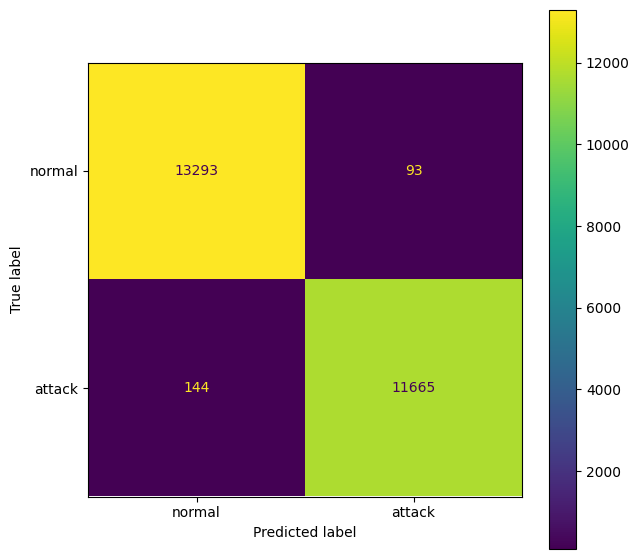

In [23]:
knn = KNeighborsClassifier(n_neighbors=10).fit(x_train, y_train)
evaluate_classification(knn, "KNeighborsClassifier", x_train, x_test, y_train, y_test)

## 3: Gaussian Naive_bayes

In [24]:
from sklearn.naive_bayes import GaussianNB

Training Accuracy GaussianNB 91.80269307480874  Test Accuracy GaussianNB 91.60547727723754
Training Precesion GaussianNB 92.62657528189256  Test Precesion GaussianNB 92.53246753246754
Training Recall GaussianNB 89.47907990004485  Test Recall GaussianNB 89.29629943263613


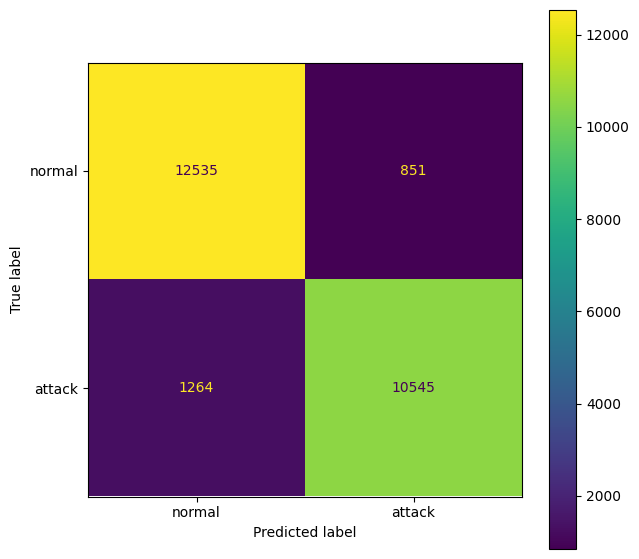

In [25]:
gnb = GaussianNB().fit(x_train, y_train)
evaluate_classification(gnb, "GaussianNB", x_train, x_test, y_train, y_test)

## 4: Suport Vector Machine

In [26]:
from sklearn import svm

Training Accuracy Linear SVC(LBasedImpl) 97.33173243894936  Test Accuracy Linear SVC(LBasedImpl) 97.1502282198849
Training Precesion Linear SVC(LBasedImpl) 96.9989350372737  Test Precesion Linear SVC(LBasedImpl) 96.80141784116803
Training Recall Linear SVC(LBasedImpl) 97.26618397727516  Test Recall Linear SVC(LBasedImpl) 97.12930815479719


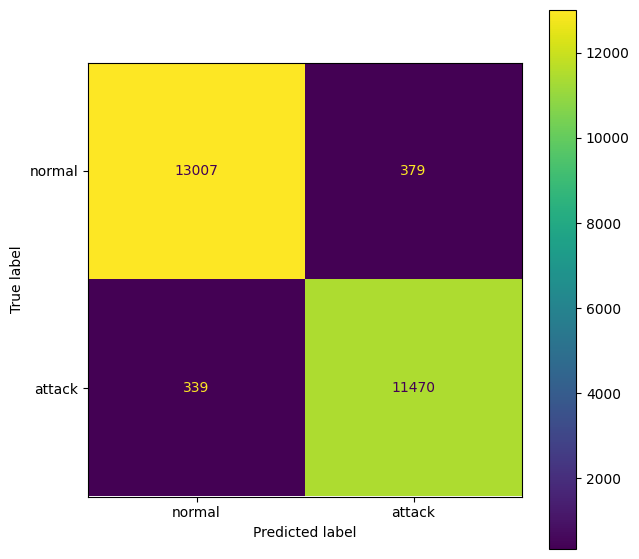

In [27]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)
evaluate_classification(lin_svc, "Linear SVC(LBasedImpl)", x_train, x_test, y_train, y_test)

## 5: DecisionTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier

Training Accuracy DecisionTreeClassifier 99.99404626055548  Test Accuracy DecisionTreeClassifier 99.87695971422902
Training Precesion DecisionTreeClassifier 100.0  Test Precesion DecisionTreeClassifier 99.85607856417202
Training Recall DecisionTreeClassifier 99.98718523739348  Test Recall DecisionTreeClassifier 99.8814463544754


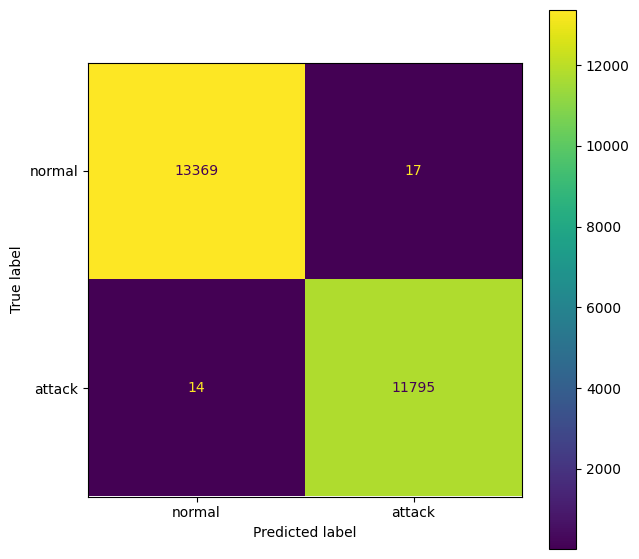

In [29]:
dt = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
tdt = DecisionTreeClassifier().fit(x_train, y_train)
evaluate_classification(tdt, "DecisionTreeClassifier", x_train, x_test, y_train, y_test)

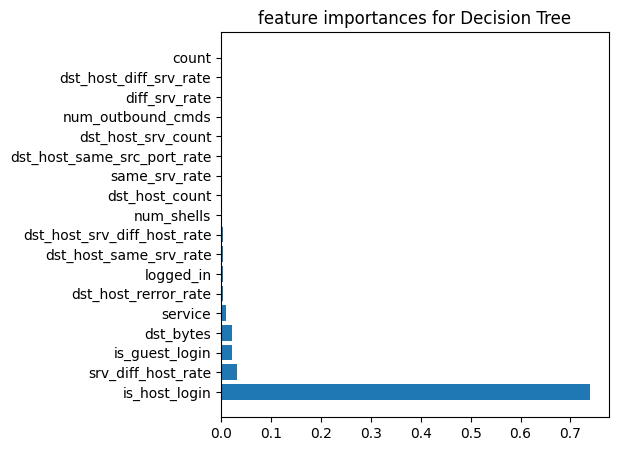

In [30]:
def f_importances(coef, names, top=-1):
    imp = coef                                              #feature importances to be visualized.
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:                                           #If set to -1, all features will be shown.
        top = len(names)

    plt.figure(figsize=(5,5))
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances for Decision Tree')
    plt.show()

features_names = data_train.drop(['outcome', 'level'] , axis = 1)
f_importances(abs(tdt.feature_importances_), features_names, top=18)

In [31]:
from sklearn import tree

[Text(0.5, 0.875, 'x[5] <= -0.056\ngini = 0.497\nsamples = 100777\nvalue = [53956, 46821]'),
 Text(0.25, 0.625, 'x[65] <= 0.5\ngini = 0.149\nsamples = 46560\nvalue = [3778, 42782]'),
 Text(0.125, 0.375, 'x[6] <= 0.005\ngini = 0.061\nsamples = 43088\nvalue = [1358, 41730]'),
 Text(0.0625, 0.125, 'gini = 0.031\nsamples = 42229\nvalue = [661, 41568]'),
 Text(0.1875, 0.125, 'gini = 0.306\nsamples = 859\nvalue = [697, 162]'),
 Text(0.375, 0.375, 'x[30] <= -0.211\ngini = 0.422\nsamples = 3472\nvalue = [2420, 1052]'),
 Text(0.3125, 0.125, 'gini = 0.021\nsamples = 1033\nvalue = [11, 1022]'),
 Text(0.4375, 0.125, 'gini = 0.024\nsamples = 2439\nvalue = [2409, 30]'),
 Text(0.75, 0.625, 'x[56] <= 0.5\ngini = 0.138\nsamples = 54217\nvalue = [50178, 4039]'),
 Text(0.625, 0.375, 'x[9] <= 0.5\ngini = 0.066\nsamples = 51813\nvalue = [50032, 1781]'),
 Text(0.5625, 0.125, 'gini = 0.027\nsamples = 49719\nvalue = [49043, 676]'),
 Text(0.6875, 0.125, 'gini = 0.498\nsamples = 2094\nvalue = [989, 1105]'),
 Te

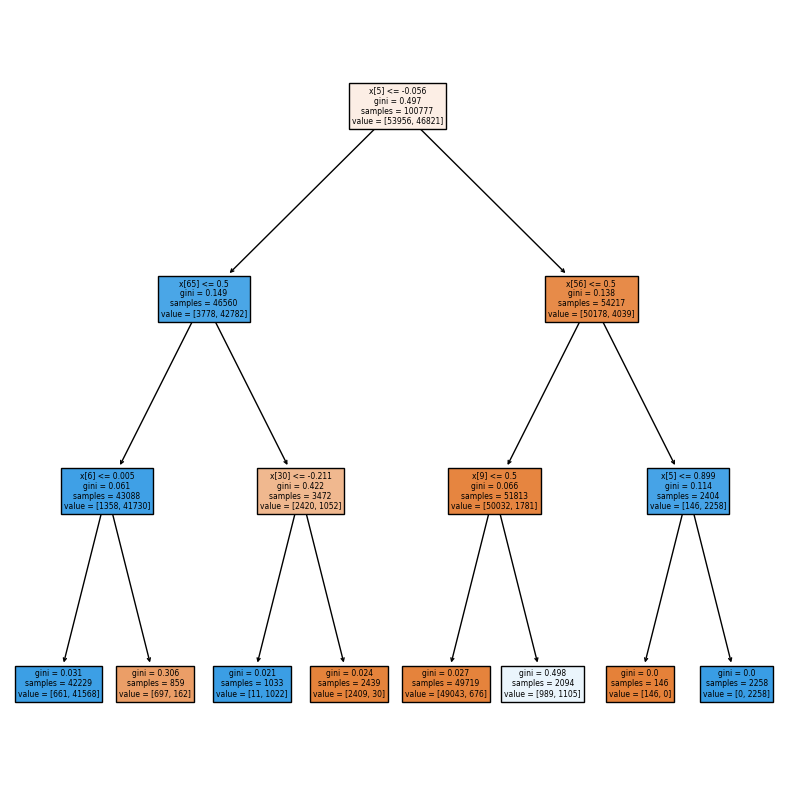

In [32]:
fig = plt.figure(figsize=(10,10))
tree.plot_tree(dt , filled=True)

## 6: Random Forest Regressor

In [33]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

Training Accuracy RandomForestClassifier 99.99404626055548  Test Accuracy RandomForestClassifier 99.89283588013494
Training Precesion RandomForestClassifier 99.9893219434063  Test Precesion RandomForestClassifier 99.95759837177748
Training Recall RandomForestClassifier 99.99786420623225  Test Recall RandomForestClassifier 99.81370141417563


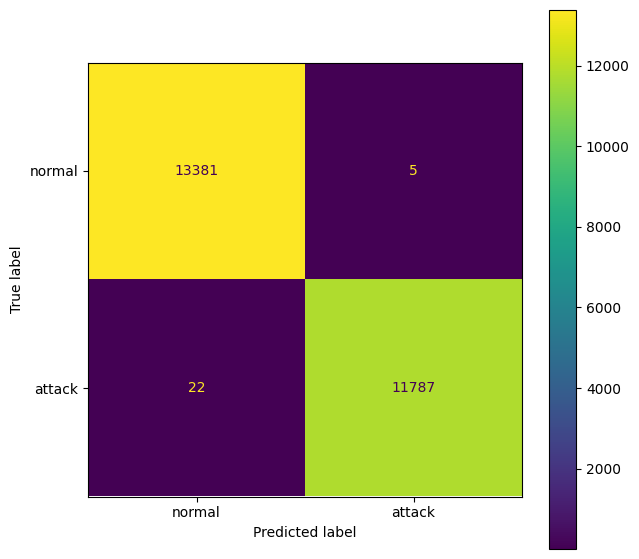

In [34]:
rf = RandomForestClassifier().fit(x_train, y_train)
evaluate_classification(rf, "RandomForestClassifier", x_train, x_test, y_train, y_test)

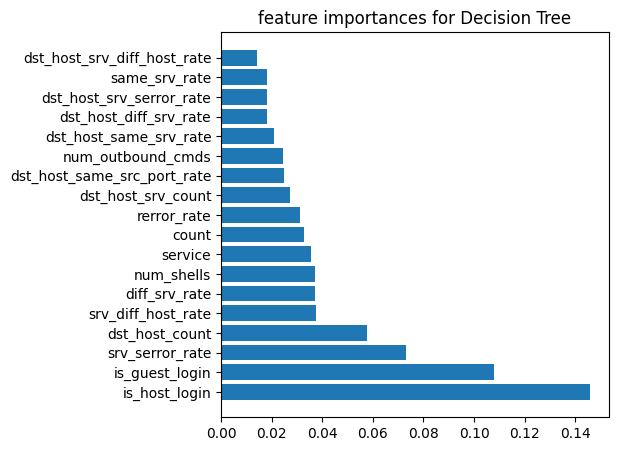

<Figure size 700x700 with 0 Axes>

In [35]:
f_importances(abs(rf.feature_importances_), features_names, top=18)
fig = plt.figure(figsize=(7,7))

## 7: XGBOOST

In [36]:
import xgboost as xgb

In [37]:
xg_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 20).fit(x_train_reg, y_train_reg)

In [38]:
name = "XGBOOST"
train_error = metrics.mean_squared_error(y_train_reg, xg_r.predict(x_train_reg), squared=False)
test_error = metrics.mean_squared_error(y_test_reg, xg_r.predict(x_test_reg), squared=False)
print("Training Error " + str(name) + " {}  Test error ".format(train_error) + str(name) + " {}".format(test_error))

Training Error XGBOOST 0.9286577828406372  Test error XGBOOST 0.9955133892384386


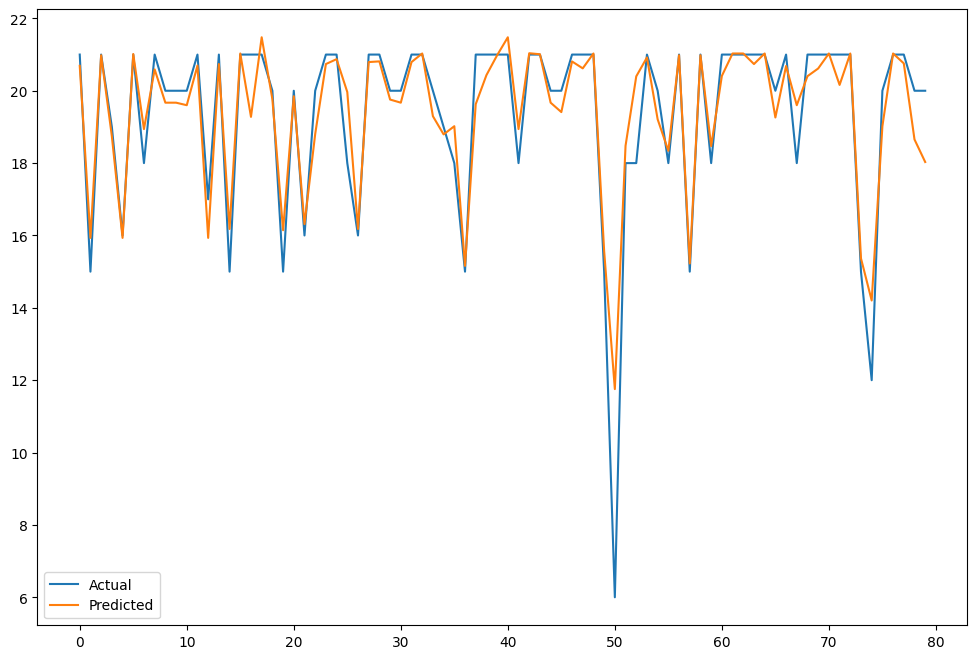

In [39]:
y_pred = xg_r.predict(x_test_reg)
df = pd.DataFrame({"Y_test": y_test_reg , "Y_pred" : y_pred})
plt.figure(figsize=(12,8))
plt.plot(df[:80])
plt.legend(['Actual' , 'Predicted'])

In [40]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

Training Accuracy PCA RandomForest 99.99404626055548  Test Accuracy PCA RandomForest 99.8094860091288
Training Precesion PCA RandomForest 99.9914571898426  Test Precesion PCA RandomForest 99.89817564700891
Training Recall PCA RandomForest 99.99572841246449  Test Recall PCA RandomForest 99.69514776865103


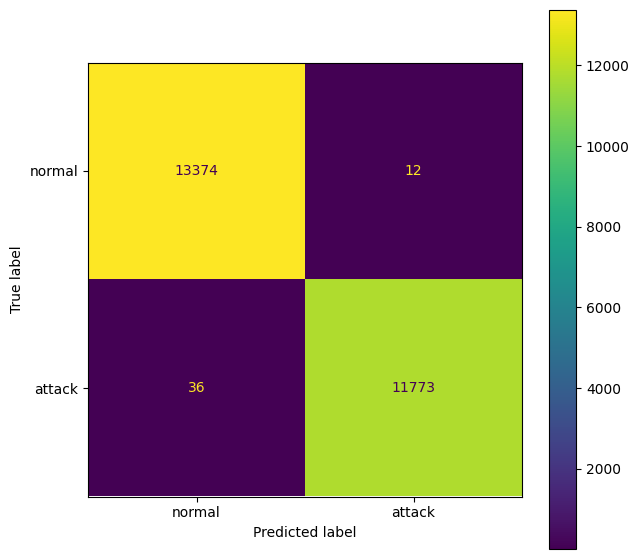

In [41]:
rrf = RandomForestClassifier().fit(x_train_reduced, y_train_reduced)
evaluate_classification(rrf, "PCA RandomForest", x_train_reduced, x_test_reduced, y_train_reduced, y_test_reduced)

# STEP 6:NEURAL NETWORK

In [42]:
import tensorflow as tf
from tensorflow.keras import regularizers

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=(x_train.shape[1:]),   #A rectified linear unit (ReLU) is an activation function that introduces the property of nonlinearity to a deep learning model and solves the vanishing gradients issue.relu=it is fast and effective to compute.
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),                                                         #Dropout=A Simple Way to Prevent Neural Networks from Overfitting
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=128, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=1, activation='sigmoid'),                                  #sigmoid=transform any real number to one between 0 and 1
])

In [44]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])  #adm=minimize the loss function during the training of neural networks.
                                                                                                                  #Binary Cross Entropy is a loss function used in machine learning and deep learning to measure the difference between predicted binary outcomes and actual binary labels.


In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                7872      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               66048     
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               6

In [46]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, verbose=1)  #epoch is when all the training data is used at once and is defined as the total number of iterations of all the training data in one cycle for training the machine learning model.
                                                                                                #verbose=1-Progress bar mode - displays a progress bar with training and validation metrics (default).

Epoch 1/10
3150/3150 [==============================] - 24s 6ms/step - loss: 267.5703 - accuracy: 0.9572 - val_loss: 80.4364 - val_accuracy: 0.9825
Epoch 2/10
3150/3150 [==============================] - 19s 6ms/step - loss: 54.8495 - accuracy: 0.9776 - val_loss: 27.6397 - val_accuracy: 0.9851
Epoch 3/10
3150/3150 [==============================] - 19s 6ms/step - loss: 15.8294 - accuracy: 0.9761 - val_loss: 0.3311 - val_accuracy: 0.9769
Epoch 4/10
3150/3150 [==============================] - 19s 6ms/step - loss: 3.1422 - accuracy: 0.9769 - val_loss: 0.1664 - val_accuracy: 0.9806
Epoch 5/10
3150/3150 [==============================] - 20s 6ms/step - loss: 0.6460 - accuracy: 0.9754 - val_loss: 0.3968 - val_accuracy: 0.9743
Epoch 6/10
3150/3150 [==============================] - 20s 6ms/step - loss: 0.1796 - accuracy: 0.9747 - val_loss: 0.3724 - val_accuracy: 0.9771
Epoch 7/10
3150/3150 [==============================] - 18s 6ms/step - loss: 0.2281 - accuracy: 0.9743 - val_loss: 0.2227 - 

# STEP 7:MODEL EVALUATION

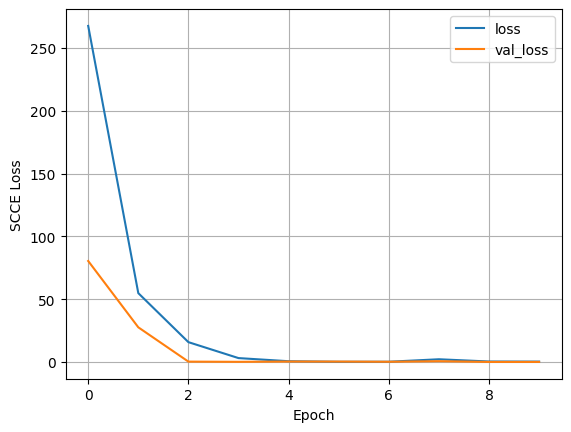

<Figure size 500x500 with 0 Axes>

In [47]:
plt.plot(history.history['loss'], label='loss')  #function that calculates the error or discrepancy between predicted and actual values.
plt.plot(history.history['val_loss'], label='val_loss') #The training loss indicates how well the model is fitting the training data, while the validation loss indicates how well the model fits new data.
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)
fig = plt.figure(figsize=(5,5))

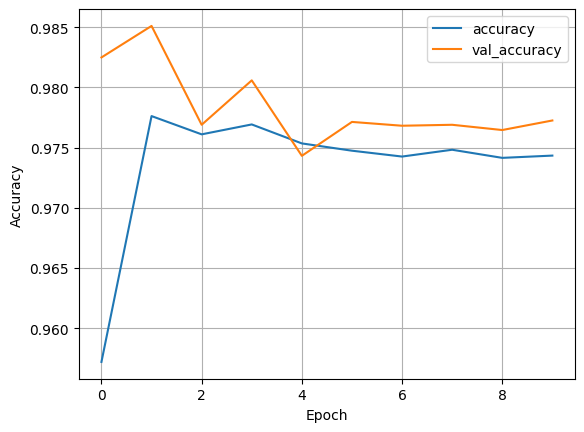

In [48]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

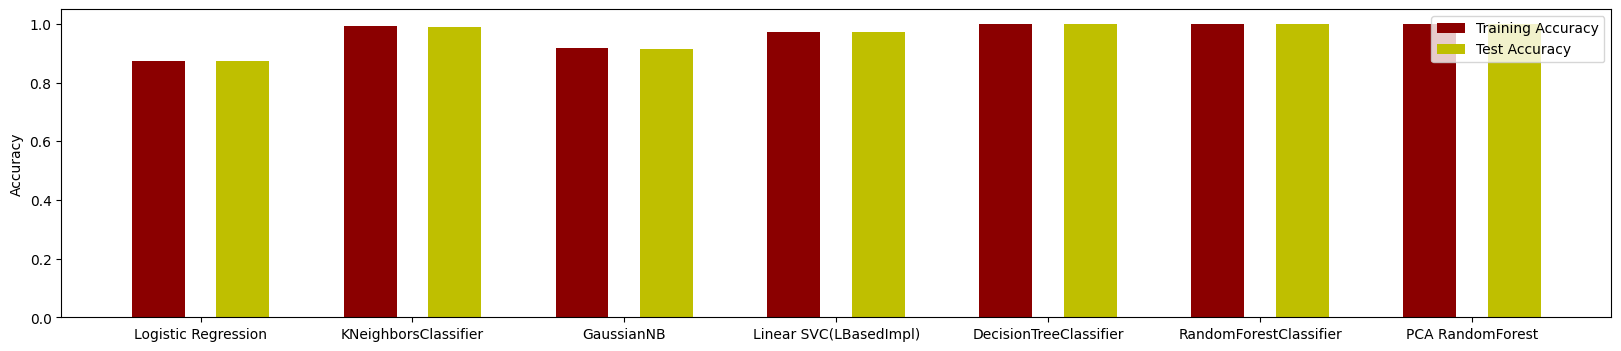

In [54]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 4))
ax.bar(np.arange(len(keys)) - 0.2, [value[0] for value in values], color='darkred', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[1] for value in values], color='y', width=0.25, align='center')
ax.legend(["Training Accuracy", "Test Accuracy"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Accuracy")
plt.show()

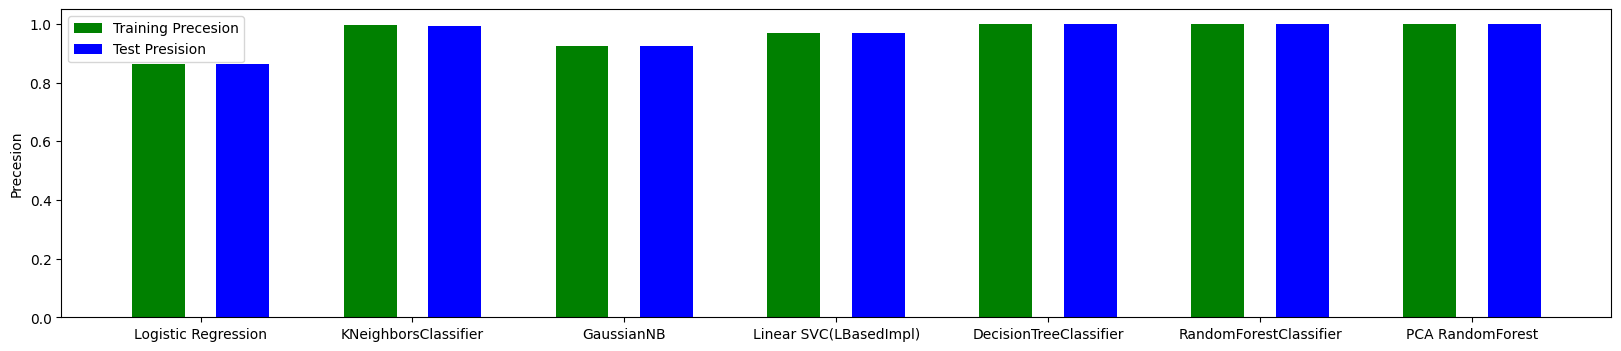

In [55]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 4))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Precesion", "Test Presision"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Precesion")
plt.show()

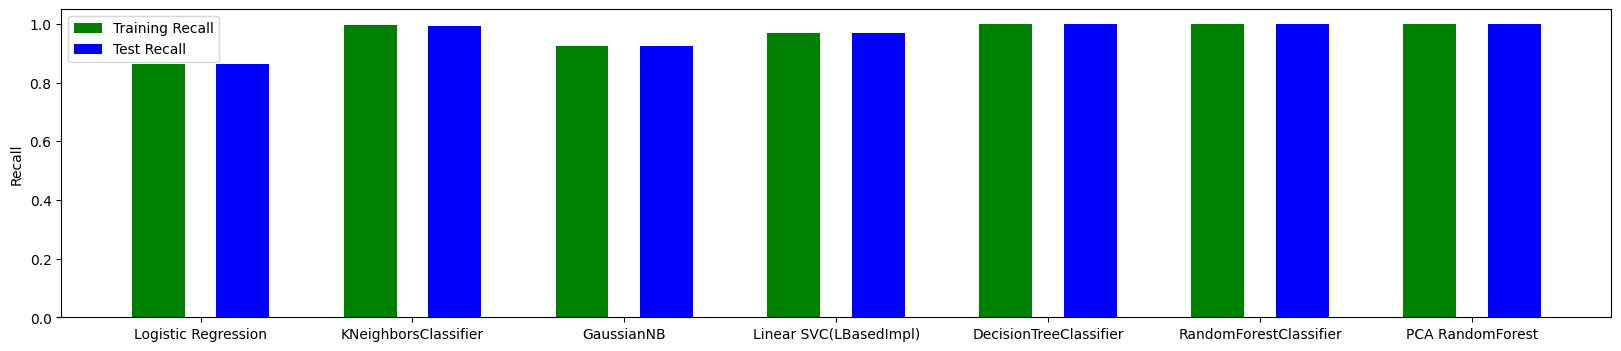

In [56]:
keys = [key for key in kernal_evals.keys()]
values = [value for value in kernal_evals.values()]
fig, ax = plt.subplots(figsize=(20, 4))
ax.bar(np.arange(len(keys)) - 0.2, [value[2] for value in values], color='g', width=0.25, align='center')
ax.bar(np.arange(len(keys)) + 0.2, [value[3] for value in values], color='b', width=0.25, align='center')
ax.legend(["Training Recall", "Test Recall"])
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
plt.ylabel("Recall")
plt.show()

# STEP 8: CHALLENGES

Lack of eough real word dataset

Data understanding

Advance malware software